# Notebook for visualizing results from the final exam 
## Intro to Neuroscience Spring 2020

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Create pandas dataframe with column names for quiz and exam data

In [134]:
file = '/Users/maltegueth/Documents/raw_quiz_scores.csv'

columns = ['student', 'percent', 'score', 'corrects', 'blanks', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'quiz']
data = pd.read_csv(file, sep=',', names=columns)

# Here are some basic stats from the dataframe (mean, median, sd)
## Note that the midterm in counted here as quiz 6. Therefore, the final is now no. 13 in the dataframe.

In [135]:
data[data['quiz'] == 13].percent.mean()

70.29166666666667

In [136]:
data[data['quiz'] == 13].percent.median()

75.5

In [137]:
data[data['quiz'] == 13].percent.std()

13.772938705291264

# Next, check some distributional plots to visualize how the class as a whole scored

In [138]:
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

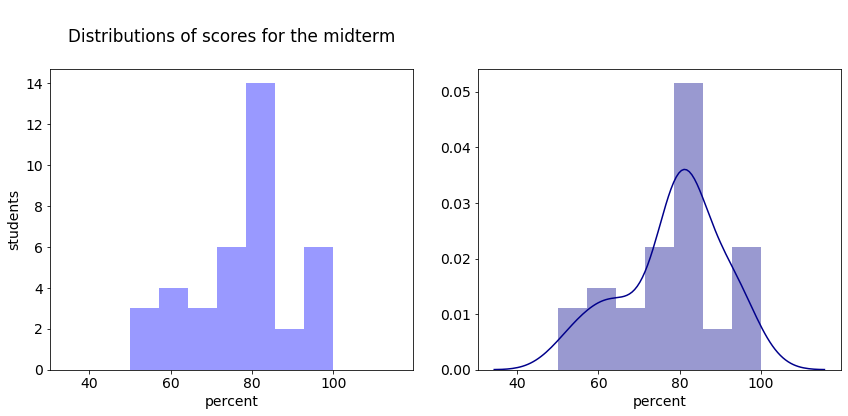

In [139]:
fig1, axes = matplotlib.pyplot.subplots(1, 2, figsize=(12, 6), sharex=True)

ax = sns.distplot(data[data['quiz'] == 7]['percent'], kde=False, color="b", ax=axes[0])
sns.distplot(data[data['quiz'] == 7]['percent'], color="darkblue", ax=axes[1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of scores for the midterm\n')

matplotlib.pyplot.tight_layout()

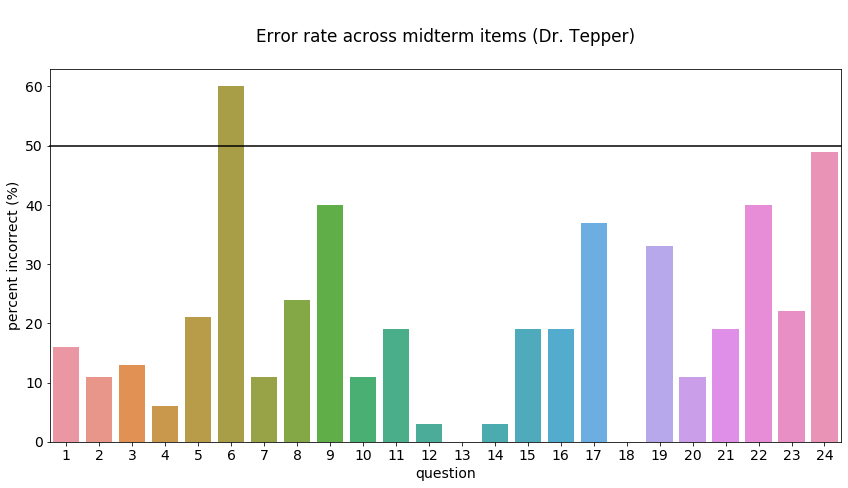

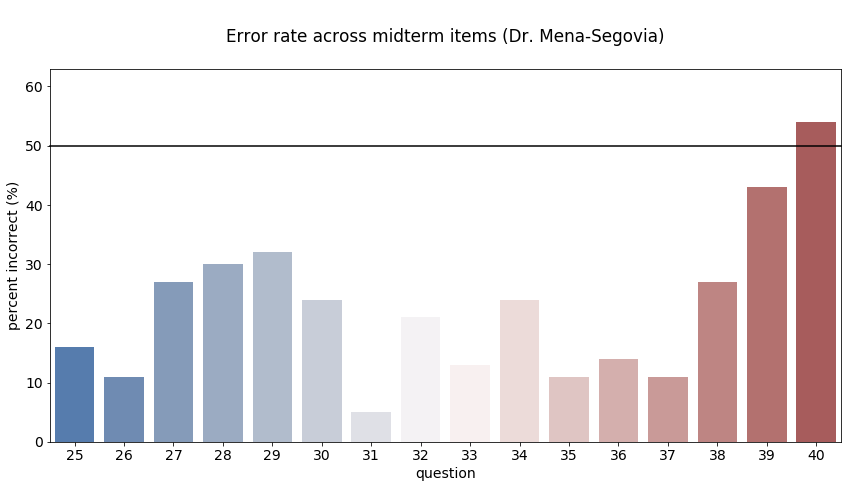

In [140]:
items = '/Users/maltegueth/items.csv'

cols = ['question', 'incorrect','section']
itemsData = pd.read_csv(items, sep=',', names=cols)
itemsData['incorrect'] = itemsData['incorrect']*100

fig2, ax1 = plt.subplots(figsize=(12, 7), sharex=True)

sns.barplot(x='question', y='incorrect', data=itemsData[itemsData['section']==0], ax=ax1)

ax1.set(ylabel='percent incorrect (%)')
ax1.set(title='\nError rate across midterm items (Dr. Tepper)\n')
ax1.axhline(50, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()


fig3, ax2 = plt.subplots(figsize=(12, 7), sharex=True)

sns.barplot(x='question', y='incorrect', palette="vlag", data=itemsData[itemsData['section']==1], ax=ax2)

ax2.set(ylabel='percent incorrect (%)')
ax2.set(title='\nError rate across midterm items (Dr. Mena-Segovia)\n')
ax2.axhline(50, color="k", clip_on=False)
ax2.set(ylim=[0, 63])
matplotlib.pyplot.tight_layout()

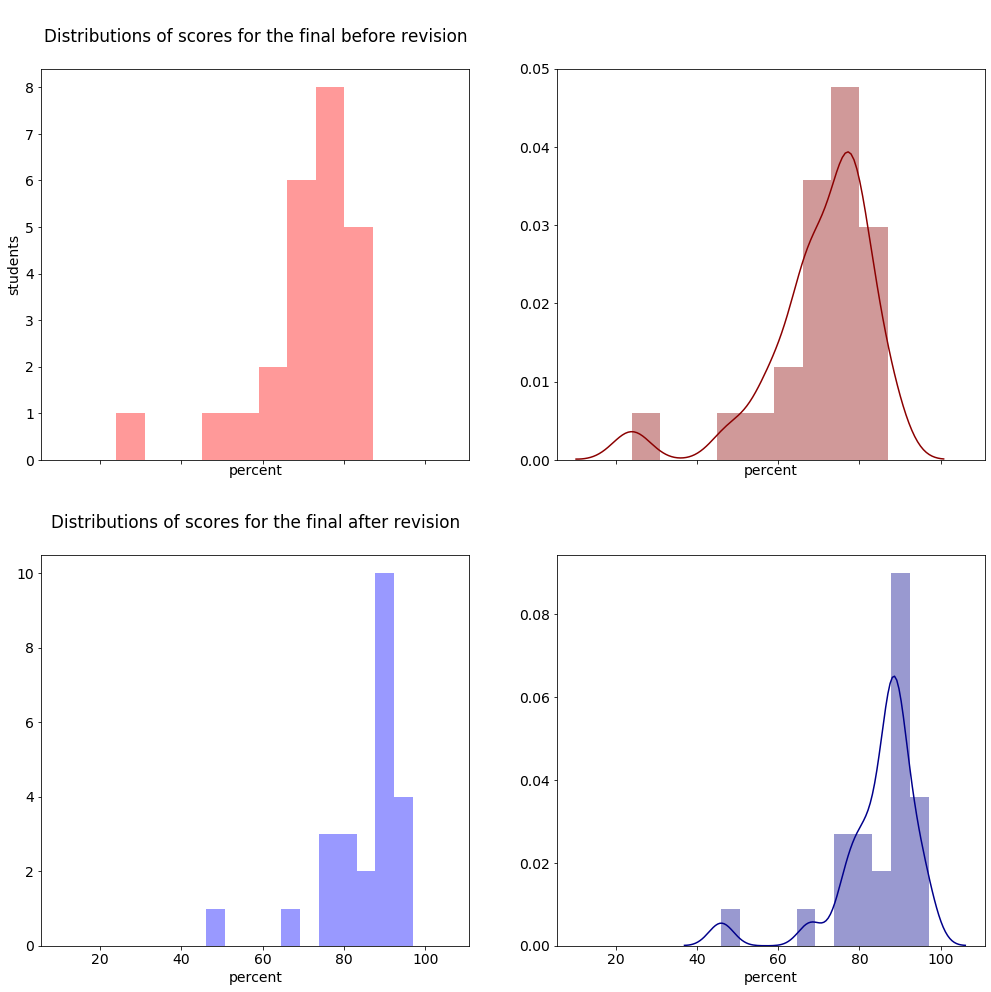

In [141]:
fig4, axes = matplotlib.pyplot.subplots(2, 2, figsize=(14, 14), sharex=True)

ax = sns.distplot(data[data['quiz'] == 13]['percent'], kde=False, color="r", ax=axes[0, 0])
ax2 = sns.distplot(data[data['quiz'] == 14]['percent'], kde=False, color='b', ax=axes[1, 0])
sns.distplot(data[data['quiz'] == 14]['percent'], color="darkblue", ax=axes[1, 1])
sns.distplot(data[data['quiz'] == 13]['percent'], color="darkred", ax=axes[0, 1])

ax.set(ylabel='students')
ax.set(title='\nDistributions of scores for the final before revision\n')
ax2.set(title='\nDistributions of scores for the final after revision\n')

matplotlib.pyplot.tight_layout()

In [142]:
items = '/Users/maltegueth/Downloads/items_finalExam.csv'

cols = ['specificity','incorrect','avgScore','StdDev','StdErr','lecturer','lecture','questionNo']
itemsData = pd.read_csv(items, sep=';', names=cols)
itemsData['incorrect'] = itemsData['incorrect']*100

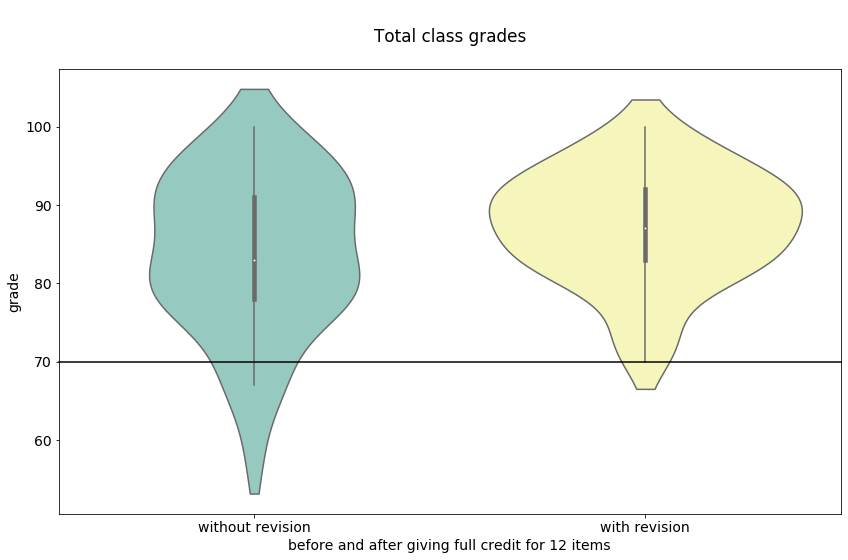

In [143]:
fig5, ax = matplotlib.pyplot.subplots(figsize=(12, 8), sharex=True)

sub = data[data['quiz'].isin([15, 16])]
sub = sub[['quiz', 'percent']]
ax = sns.violinplot(data=sub, palette="Set3", cut=1, x='quiz', y='percent')

ax.set(ylabel='grade')
ax.set(xlabel='before and after giving full credit for 12 items')
ax.set(xticklabels=['without revision','with revision'])
ax.set(title='\nTotal class grades\n')
ax.axhline(70, color="k", clip_on=False)

matplotlib.pyplot.tight_layout()

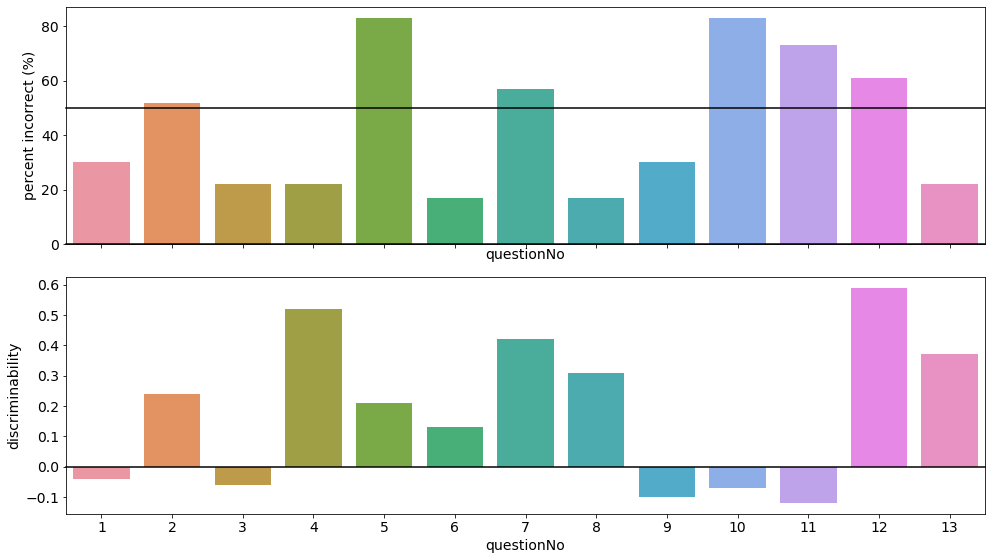

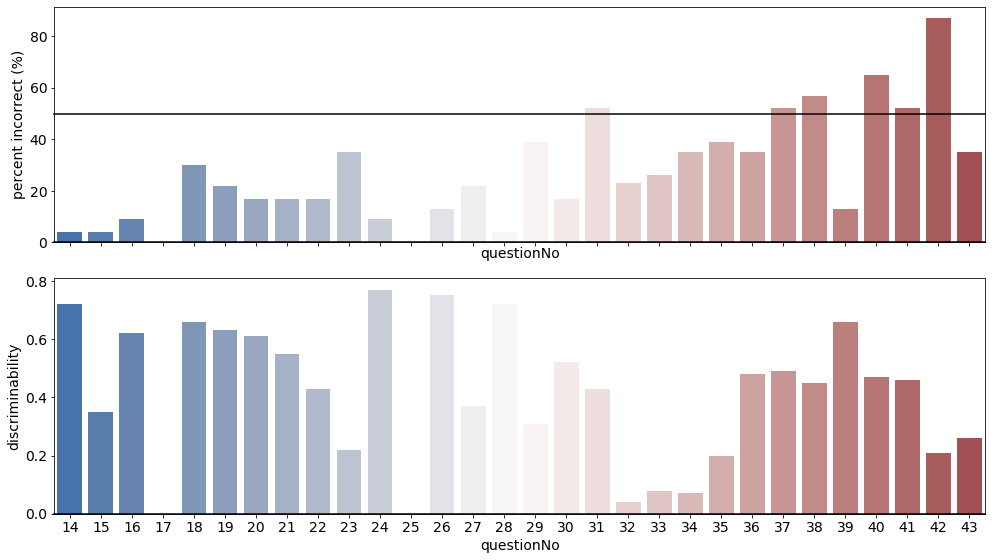

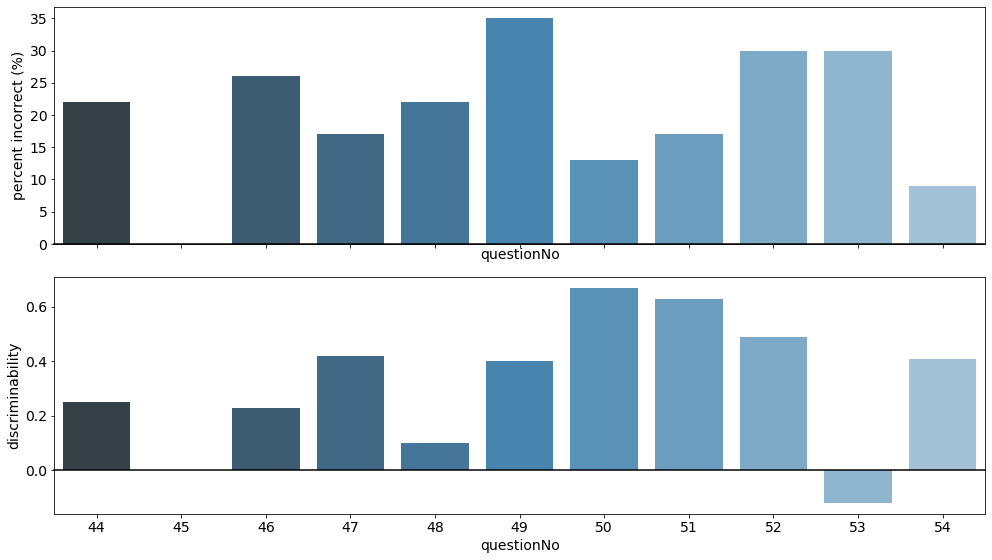

In [144]:
# Set up the matplotlib figure
fig6, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Generate some sequential data
sns.barplot(x='questionNo', y='incorrect', data=itemsData[itemsData['lecturer']==1], ax=ax1)
ax1.set(ylabel='percent incorrect (%)')
#ax1.set(title='\nItems statistics (Dr. Mena-Segovia)\n')
ax1.axhline(0, color="k", clip_on=False)
ax1.axhline(50, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()

# Center the data to make it diverging
sns.barplot(x='questionNo', y='specificity', data=itemsData[itemsData['lecturer']==1], ax=ax2)
ax2.set(ylabel='discriminability')
#ax2.set(title='\nError rate across items (Dr. Mena-Segovia)\n')
ax2.axhline(0, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()

# Set up the matplotlib figure
fig7, (ax3, ax4) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Generate some sequential data
sns.barplot(x='questionNo', y='incorrect', palette="vlag", data=itemsData[itemsData['lecturer']==2], ax=ax3)
ax3.set(ylabel='percent incorrect (%)')
#ax1.set(title='\nItems statistics (Dr. Mena-Segovia)\n')
ax3.axhline(0, color="k", clip_on=False)
ax3.axhline(50, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()

# Center the data to make it diverging
sns.barplot(x='questionNo', y='specificity', palette="vlag", data=itemsData[itemsData['lecturer']==2], ax=ax4)
ax4.set(ylabel='discriminability')
#ax2.set(title='\nError rate across items (Dr. Mena-Segovia)\n')
ax4.axhline(0, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()

# Set up the matplotlib figure
fig8, (ax5, ax6) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Generate some sequential data
sns.barplot(x='questionNo', y='incorrect', palette="Blues_d", data=itemsData[itemsData['lecturer']==3], ax=ax5)
ax5.set(ylabel='percent incorrect (%)')
#ax1.set(title='\nItems statistics (Dr. Mena-Segovia)\n')
ax5.axhline(0, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()

# Center the data to make it diverging
sns.barplot(x='questionNo', y='specificity', palette="Blues_d", data=itemsData[itemsData['lecturer']==3], ax=ax6)
ax6.set(ylabel='discriminability')
#ax2.set(title='\nError rate across items (Dr. Mena-Segovia)\n')
ax6.axhline(0, color="k", clip_on=False)
matplotlib.pyplot.tight_layout()

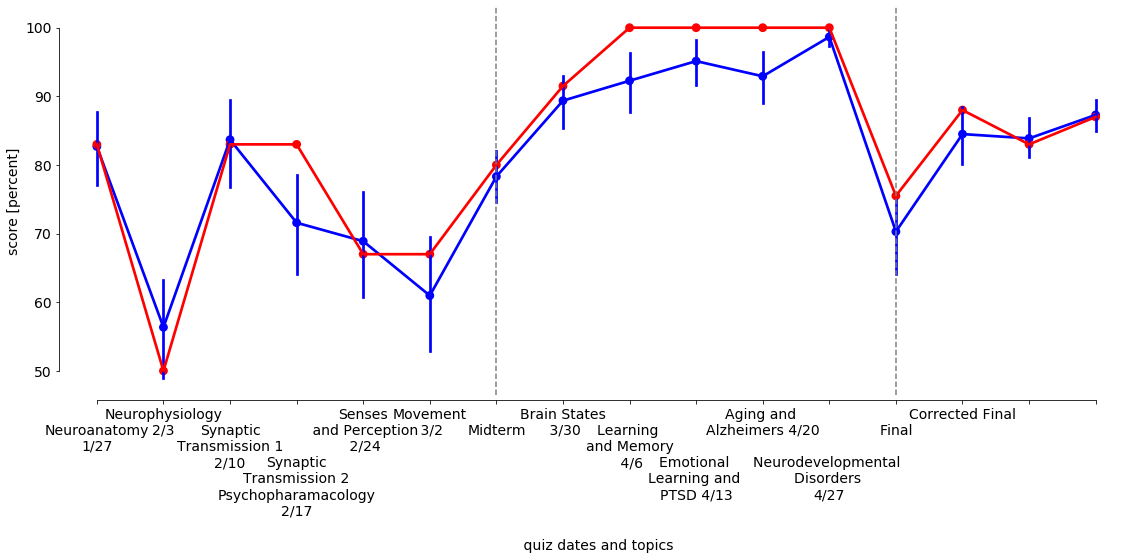

In [145]:
fig9 = matplotlib.pyplot.figure(figsize=(16, 8))

ax = sns.pointplot(x="quiz", y="percent", ci=95, estimator=np.mean, data=data, color='b', legend=False)
sns.pointplot(x="quiz", y="percent",  ci=None, estimator=np.median, data=data, ax=ax, color='r', legend=False)

ax.set(ylabel='score [percent]')

ax.set(xlabel="\n quiz dates and topics")
ax.set(xticklabels=['\nNeuroanatomy\n1/27', 'Neurophysiology\n2/3', 
                    '\nSynaptic\nTransmission 1\n2/10', '\n\n\nSynaptic\nTransmission 2\nPsychopharamacology\n2/17',
                    'Senses\n and Perception\n 2/24', 'Movement\n 3/2', '\nMidterm', 'Brain States\n 3/30',
                    '\nLearning \nand Memory\n 4/6', '\n\n\nEmotional \nLearning and \nPTSD 4/13',
                    'Aging and \nAlzheimers 4/20','\n\n\nNeurodevelopmental \nDisorders \n4/27','\nFinal',
                    'Corrected Final'])

#ax.legend(['Mean', 'Median'])
ax.axvline(6, color="grey", clip_on=False, linestyle='--')
ax.axvline(12, color="grey", clip_on=False, linestyle='--')

sns.despine(offset=5, trim=True)
matplotlib.pyplot.tight_layout()

In [146]:
fig1.savefig('/Users/maltegueth/Desktop/midterm_dist-1.tiff')
fig2.savefig('/Users/maltegueth/Desktop/midterm_errorRates_Tepper-2.tiff')
fig3.savefig('/Users/maltegueth/Desktop/midterm_errorRates_Mena-3.tiff')
fig4.savefig('/Users/maltegueth/Desktop/final_dist-4.tiff')
fig5.savefig('/Users/maltegueth/Desktop/final_violin-5.tiff')
fig6.savefig('/Users/maltegueth/Desktop/final_itemStats_Mena-6.tiff')
fig7.savefig('/Users/maltegueth/Desktop/final_itemStats_Gluck-7.tiff')
fig8.savefig('/Users/maltegueth/Desktop/final_itemStats_Peters-8.tiff')
fig9.savefig('/Users/maltegueth/Desktop/quizzes-9.tiff')